# Capstone (1 milestone) - predicting bad loans from LC dataset

## Problem Statement

Lending Club (LC) is an online company that utilizes P2P lending in 2006. In the years after the 2008 crisis, this gained substantial traction due to the banks capability and unwillingness to lend.

Today, as tech companies obtain digital banking licenses in Singapore, fintech innovations are going to pose a disruptive potential to financial services of traditional banks. The goal is to build a business model off microloans to individual users who are using mobile wallets like Grabpay by first analyzing the features that will best be able to predict whether a loan is good or bad using data from LC, then understanding how mobile wallets around the world offer this service (Wechat, alipay). Finally, the deliverable is a business model (max loan amounts, repayment periods) that existing mobile wallets can adopt for users based on the data that is likely to already have been collected as part of the service they provide.

Additional info:
Always a trade off between privacy and better services. More intrusive data collection -> better predictions -> less default risk -> more optimized products.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents: (TOBE UPDATED)
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, linear_model, datasets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from tempfile import mkdtemp
cachedir=mkdtemp()


sns.set(font_scale=2.0)
%matplotlib inline

#setting low_memory to false ensures that we do not have mixed type inferences when loading the data since it is huge.
df = pd.read_csv('./lending-club-loan-data/loan.csv', low_memory=False)

In [2]:
#sort column names in accordance to data dictionary for easy reference
df = df[df.columns.sort_values(ascending=True)]

In [3]:
def data_show(data):
    print(data.shape)
    #set the max rows=150 since there are 145 columns
    pd.options.display.max_rows = 150
    print(data.head(2).T)
    print(data.tail(2).T)
    #verbose = True expands out the rows, null_counts to count non-na values
    print(data.info(verbose=True, null_counts=True))
    print(data.isnull().sum())
    return data.describe().T

In [4]:
data_show(df)

(2260668, 145)
                                                             0  \
acc_now_delinq                                               0   
acc_open_past_24mths                                         9   
addr_state                                                  NY   
all_util                                                    28   
annual_inc                                               55000   
annual_inc_joint                                           NaN   
application_type                                    Individual   
avg_cur_bal                                               1878   
bc_open_to_buy                                           34360   
bc_util                                                    5.9   
chargeoff_within_12_mths                                     0   
collection_recovery_fee                                      0   
collections_12_mths_ex_med                                   0   
debt_settlement_flag                                         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
acc_now_delinq                                2260639 non-null float64
acc_open_past_24mths                          2210638 non-null float64
addr_state                                    2260668 non-null object
all_util                                      1394320 non-null float64
annual_inc                                    2260664 non-null float64
annual_inc_joint                              120710 non-null float64
application_type                              2260668 non-null object
avg_cur_bal                                   2190322 non-null float64
bc_open_to_buy                                2185733 non-null float64
bc_util                                       2184597 non-null float64
chargeoff_within_12_mths                      2260523 non-null float64
collection_recovery_fee                       2260668 non-null float64
collections_12_mths_ex_med           

acc_now_delinq                                     29
acc_open_past_24mths                            50030
addr_state                                          0
all_util                                       866348
annual_inc                                          4
annual_inc_joint                              2139958
application_type                                    0
avg_cur_bal                                     70346
bc_open_to_buy                                  74935
bc_util                                         76071
chargeoff_within_12_mths                          145
collection_recovery_fee                             0
collections_12_mths_ex_med                        145
debt_settlement_flag                                0
debt_settlement_flag_date                     2227612
deferral_term                                 2250055
delinq_2yrs                                        29
delinq_amnt                                        29
desc                        

,count,mean,std,min,25%,50%,75%,max
acc_now_delinq,2260639.0,0.004148,0.069617,0.000000e+00,0.0000,0.000000,0.000000,1.400000e+01
acc_open_past_24mths,2210638.0,4.521656,3.164229,0.000000e+00,2.0000,4.000000,6.000000,6.400000e+01
all_util,1394320.0,57.032295,20.904748,0.000000e+00,43.0000,58.000000,72.000000,2.390000e+02
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000000,93000.000000,1.100000e+08
annual_inc_joint,120710.0,123624.636701,74161.346328,5.693510e+03,83400.0000,110000.000000,147995.000000,7.874821e+06
avg_cur_bal,2190322.0,13547.797509,16474.075010,0.000000e+00,3080.0000,7335.000000,18783.000000,9.580840e+05
bc_open_to_buy,2185733.0,11394.262688,16599.534400,0.000000e+00,1722.0000,5442.000000,14187.000000,7.111400e+05
bc_util,2184597.0,57.899948,28.583475,0.000000e+00,35.4000,60.200000,83.100000,3.396000e+02
chargeoff_within_12_mths,2260523.0,0.008464,0.104810,0.000000e+00,0.0000,0.000000,0.000000,1.000000e+01
collection_recovery_fee,2260668.0,22.593284,127.111362,0.000000e+00,0.0000,0.000000,0.000000,7.174719e+03


In [5]:
def clean(data):
    #remove joint accounts from the dataset
    df2 = data
    df2 = df2[df2['application_type'] != 'Joint App']
    #remove unverified income accounts from the dataset
    df2 = df2[df2['verification_status'] != 'Not Verified']
    return df2

In [6]:
df = clean(df)

Text(0.5, 1.0, 'Total committed by Investors')

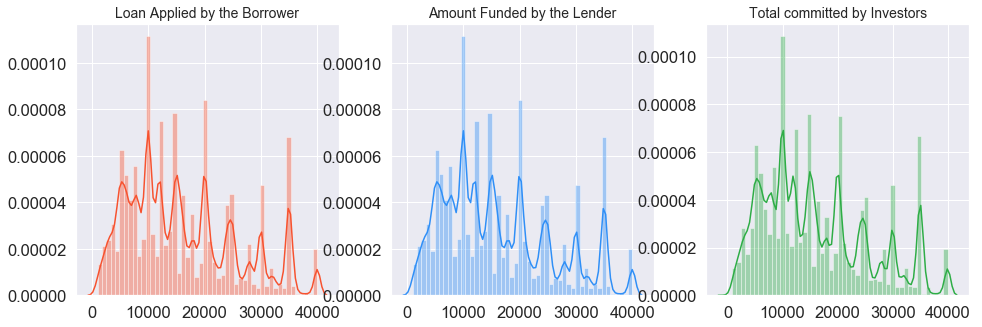

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))




loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values
investor_funds = df["funded_amnt_inv"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

#find a way to stack these up and add a legend to it to identify any difference.

Three questions arise when we attempt to plot these graphs above:
1. What is the distribution of the loans applied by the borrower?
2. What is the distribution of the amount funded by LC?
3. Since LC is a P2P marketplace, what is the total amount committed by investors?

Loans applied by the Borrower is funded by the lender and committed by investors, hence showing a similar distribution across all 3 graphs. Since the loans applied are not discriminated against whether it is successful or not, these graphs show that all loans are likely to be funded. (check for rejection rate?)

In [8]:
# Lets' transform the issue dates by year.
def datetime_year(col):
    print(df[col].head())
    dt_series = pd.to_datetime(df[col])
    df['year'] = dt_series.dt.year
    df['year'].value_counts()

In [9]:
datetime_year('issue_d')

1    Dec-2018
2    Dec-2018
3    Dec-2018
6    Dec-2018
7    Dec-2018
Name: issue_d, dtype: object


Text(0, 0.5, 'Average loan amount issued')

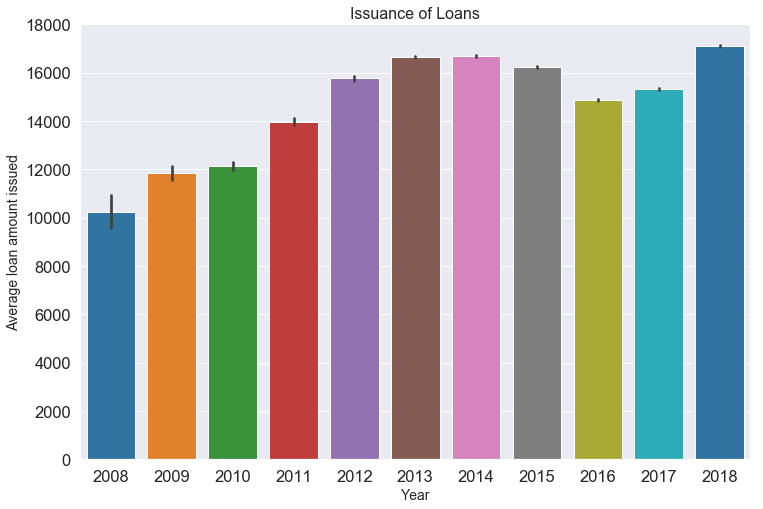

In [10]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

LC was launched in 2007, this is the period when the economy was nearing the end of its economic cycle. Following 2008, there is an increase in the loans which rose in tandem with the recovery of the economy. This makes sense if people are taking on loans to set up businesses, fund housing mortgages, loans when the economy is picking up and they are increasing their consumption.

# Looking at good loans vs bad loans

In [11]:
df['loan_status'].value_counts()

Fully Paid                                             695916
Current                                                520159
Charged Off                                            199742
Late (31-120 days)                                      14685
In Grace Period                                          5872
Late (16-30 days)                                        2445
Does not meet the credit policy. Status:Fully Paid        667
Does not meet the credit policy. Status:Charged Off       250
Default                                                    20
Name: loan_status, dtype: int64

Anything that is not fully paid will be considered a bad loan. Current should not be considered since we are training a classification model. Think in this case, borrower took a 3 year loan and has been consistently paying up for the first 6 months. Should this case be considered a good loan? I feel there is not enough grounds to classify this as a good loan. From an investor point of view, if i purchase securities with 5 year term, is it good enough to say that since it has been paying dividends consistently for the first year, it is a good investment? And based on the assumption that it is a good investment, i use this case as grounds for evaluation for future investments? Therefore all the current loans should be excluded. On the other hand, i choose to be more strict in identifying bad loans. It is not fair to consider grace period, but as long as it is late by 2 weeks and above, it can be considered a bad loan. Again, as an investor, i do not want to put my money in a security that delays payment of dividends as it shows poor cashflow.

In [12]:
#Remove ambiguous data that are not useful for training the classification model
def loan_stat(data):
    df = data[data['loan_status']!='Current']
    df = df[df['loan_status']!='In Grace Period']
    #no idea what is 'does not meet the credit policy' so it should be excluded in the training model
    df = df[df['loan_status']!='Does not meet the credit policy. Status:Fully Paid']
    df = df[df['loan_status']!='Does not meet the credit policy. Status:Charged Off']
    print(df.shape)
    return df

In [13]:
df_new = loan_stat(df)

(912808, 146)


In [14]:
#Replace fully paid with 0s and the rest with 1s. Note the positive target is a bad loan hence 1s.
df_new['loan_status'] = df_new['loan_status'].map(lambda x: 0 if x == 'Fully Paid' else 1)

In [15]:
#Check if it matches the top
df_new['loan_status'].value_counts()

0    695916
1    216892
Name: loan_status, dtype: int64

[Text(318.3058823529412, 0.5, '(%)')]

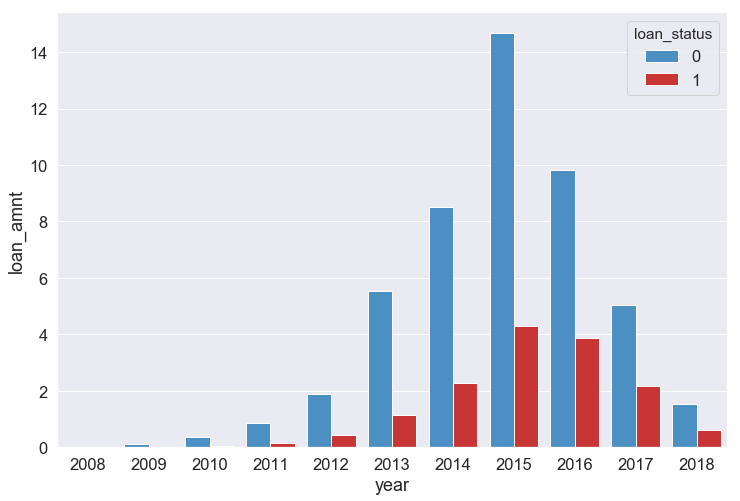

In [16]:
#f, ax = plt.subplots(1,2, figsize=(16,8))



# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

plt.figure(figsize=(12,8))
sns.barplot(x="year", y="loan_amnt", hue="loan_status", data=df_new, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

There was some financial scare around 2016 not amounting to a recession and we can see how the amount of loans skyrocketed just before. There is demand for cash just before 2016. from 2016 onwards there is a general downward trend which deviates from economic data (could this be regulation?)

Analysis by income

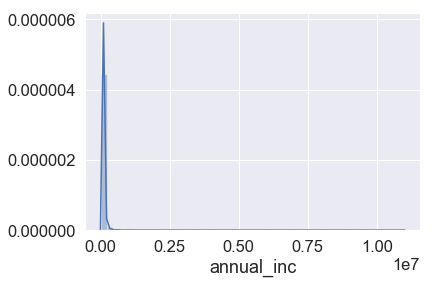

In [17]:
sns.distplot(df_new['annual_inc']);

This graph is expected to be skewed in this way, but the basic idea is to separate my income groups into high, medium, low to dwell into more in-depth analysis.

In [18]:
#to determine what should be the cut off point for low income group. Based on the below info, 85000 is the 75th percentile
df_new[df_new['loan_status'] == 1]['annual_inc'].describe()

count    2.168920e+05
mean     7.305611e+04
std      7.453485e+04
min      2.400000e+03
25%      4.500000e+04
50%      6.100000e+04
75%      8.600000e+04
max      9.573072e+06
Name: annual_inc, dtype: float64

In [19]:
#Create new column called income_category, set below 100000 = low, 100000-200000 = medium, above 200000 high

def income_cat(data):
    data['income_category'] = np.nan
    #selecting rows where annual income is less than 100000: df_new[df_new['annual_inc'] <= 100000]['annual_inc']
    data.loc[data['annual_inc'] <= 100000, 'income_category'] = 'Low'
    data.loc[(data['annual_inc'] > 100000) & (data['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    data.loc[data['annual_inc'] > 200000, 'income_category'] = 'High'
    df_1 = data
    return df_1

In [20]:
df_new = income_cat(df_new)

In [21]:
df_new['income_category'].value_counts()

Low       726207
Medium    161269
High       25332
Name: income_category, dtype: int64

In [22]:
#i am against converting the employment length to integers (prefer dummies) but for the sake of plotting, we will do it.
df_new['emp_length'].value_counts()

10+ years    301573
2 years       80358
< 1 year      72464
3 years       71329
1 year        60509
5 years       56039
4 years       53416
6 years       41663
8 years       41115
7 years       40170
9 years       34295
Name: emp_length, dtype: int64

In [23]:
df_new['emp_length'].isnull().sum()

59877

In [24]:
def employment_dm(data):
    data['employment_cat'] = np.nan
    #selecting rows where annual income is less than 100000: df_new[df_new['annual_inc'] <= 100000]['annual_inc']
    data.loc[data['emp_length'] == '10+ years', 'employment_cat'] = 10
    data.loc[data['emp_length'] == '9 years', 'employment_cat'] = 9
    data.loc[data['emp_length'] == '8 years', 'employment_cat'] = 8
    data.loc[data['emp_length'] == '7 years', 'employment_cat'] = 7
    data.loc[data['emp_length'] == '6 years', 'employment_cat'] = 6
    data.loc[data['emp_length'] == '5 years', 'employment_cat'] = 5
    data.loc[data['emp_length'] == '4 years', 'employment_cat'] = 4
    data.loc[data['emp_length'] == '3 years', 'employment_cat'] = 3
    data.loc[data['emp_length'] == '2 years', 'employment_cat'] = 2
    data.loc[data['emp_length'] == '1 year', 'employment_cat'] = 1
    data.loc[data['emp_length'] == '< 1 year', 'employment_cat'] = 0.5
    data['employment_cat'] = data['employment_cat'].fillna(0)
    df_1 = data
    return df_1

In [25]:
df_new = employment_dm(df_new)

In [26]:
def distinct_hist(feature):
    x1 = df_new[df_new['loan_status']==1][feature]
    x2 = df_new[df_new['loan_status']==0][feature]

    #Stack the data
    plt.figure()
    plt.hist([x1,x2], bins=10, stacked=True, density=True)
    plt.show()

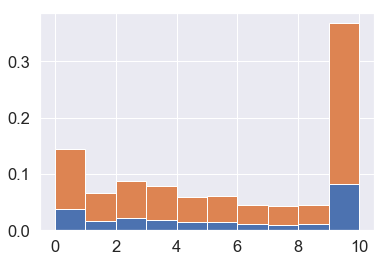

In [27]:
distinct_hist('employment_cat')

Setting employment status to be 1 or 0 is not fair nor useful in predicting the loans that are likely to be bad based on this histogram. The proportion seems quite evenly spread out, not favouring any year of employment.

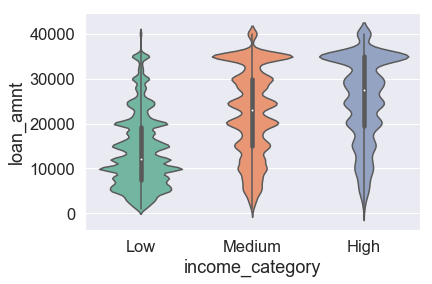

In [28]:
#fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amnt", data=df_new, palette="Set2" )

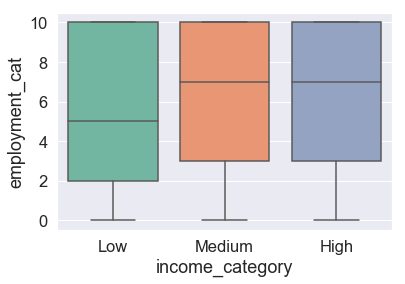

In [29]:
sns.boxplot(x="income_category", y="employment_cat", data=df_new, palette="Set2")

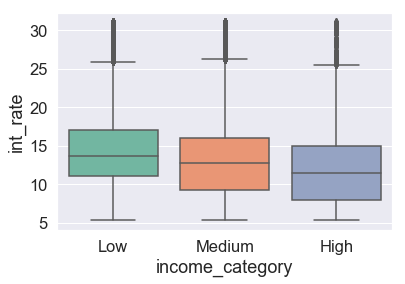

In [30]:
sns.boxplot(x="income_category", y="int_rate", data=df_new, palette="Set2")

# Assess risk

Key factors here are going to debt to income ratio
average length of employment
(do away the states because i intend to apply to singapore context, no need for states)
Credit score analysis

In [31]:
default_ratio = len(df_new[df_new['loan_status'] == 1]) / len(df_new[df_new['loan_status'] == 0])
average_dti = df_new.dti.mean()
average_emp_length = df_new.employment_cat.mean()
number_of_badloans = len(df_new[df_new['loan_status'] == 1])

#Put to a dictionary
risk_data = dict([('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('average_dti', average_dti),
                         ('average_emp_length', average_emp_length)])


# Put to a dataframe
risk_df = pd.DataFrame(risk_data, index=[0])
risk_df = risk_df.round(decimals=3)
risk_df.head()

,default_ratio,badloans_amount,average_dti,average_emp_length
0,0.312,216892,18.295,5.642


This is just a very rough comparison of the default ratio (% bad loans), average debt to income ratio and employment length.

## Use of credit scores

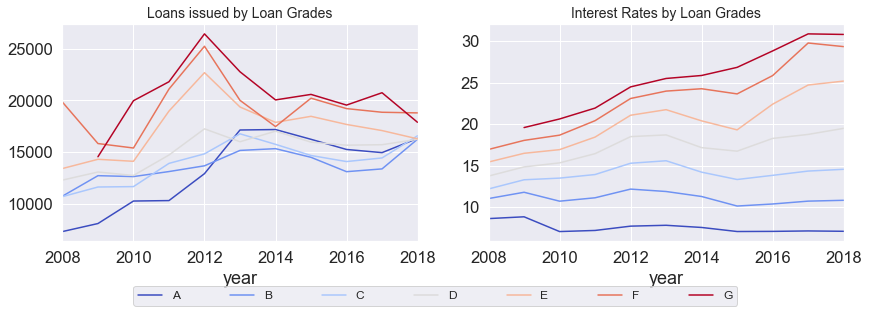

In [32]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df_new.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Loan Grades', fontsize=14)
    
    
by_inc = df_new.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Loan Grades', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

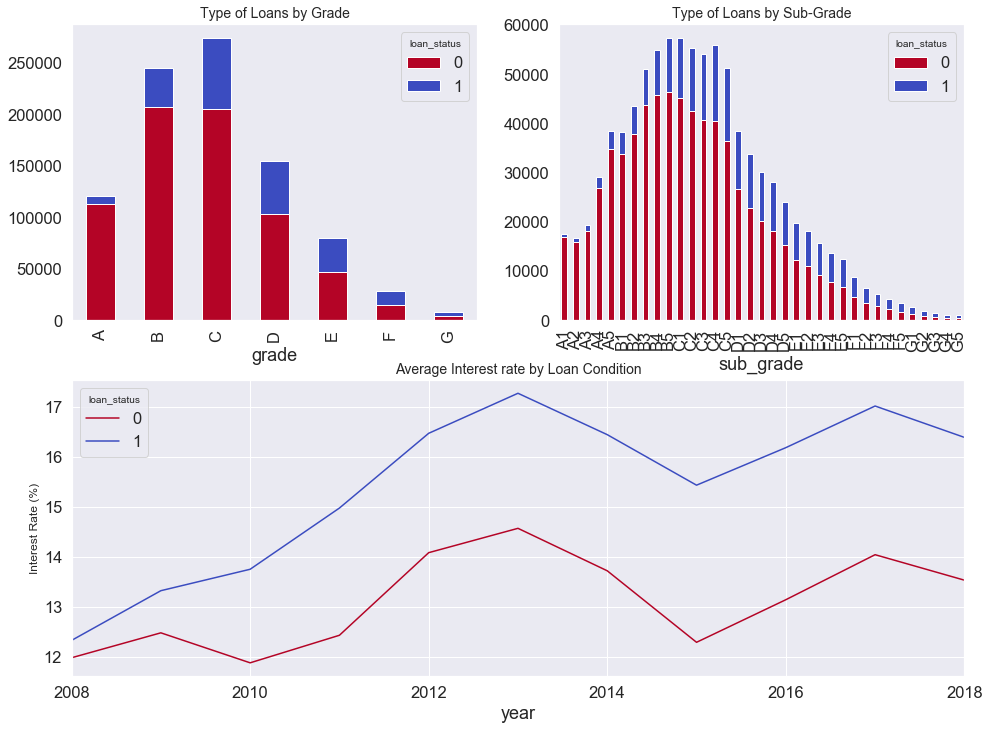

In [33]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = df_new.groupby(['grade', 'loan_status']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = df_new.groupby(['sub_grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = df_new.groupby(['year', 'loan_status']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

The grades of loans that have the highest bad loans is C followed by B/D then E. A and F have around the same number of bad loans. It is important to note that these refer to the number of bad loans, not the rate of bad loans(percentage over the total number of loans in that category). The average interest rates are higher for the bad loans than the good loans which makes sense as the higher interest rates are used to compensate for the amount of risk the borrower has to accept just like that of junk bonds.

# What constitutes a bad loan

In [34]:
numeric_variables = df_new.select_dtypes(exclude=["object"])

In [35]:
numeric_variables.shape

(912808, 112)

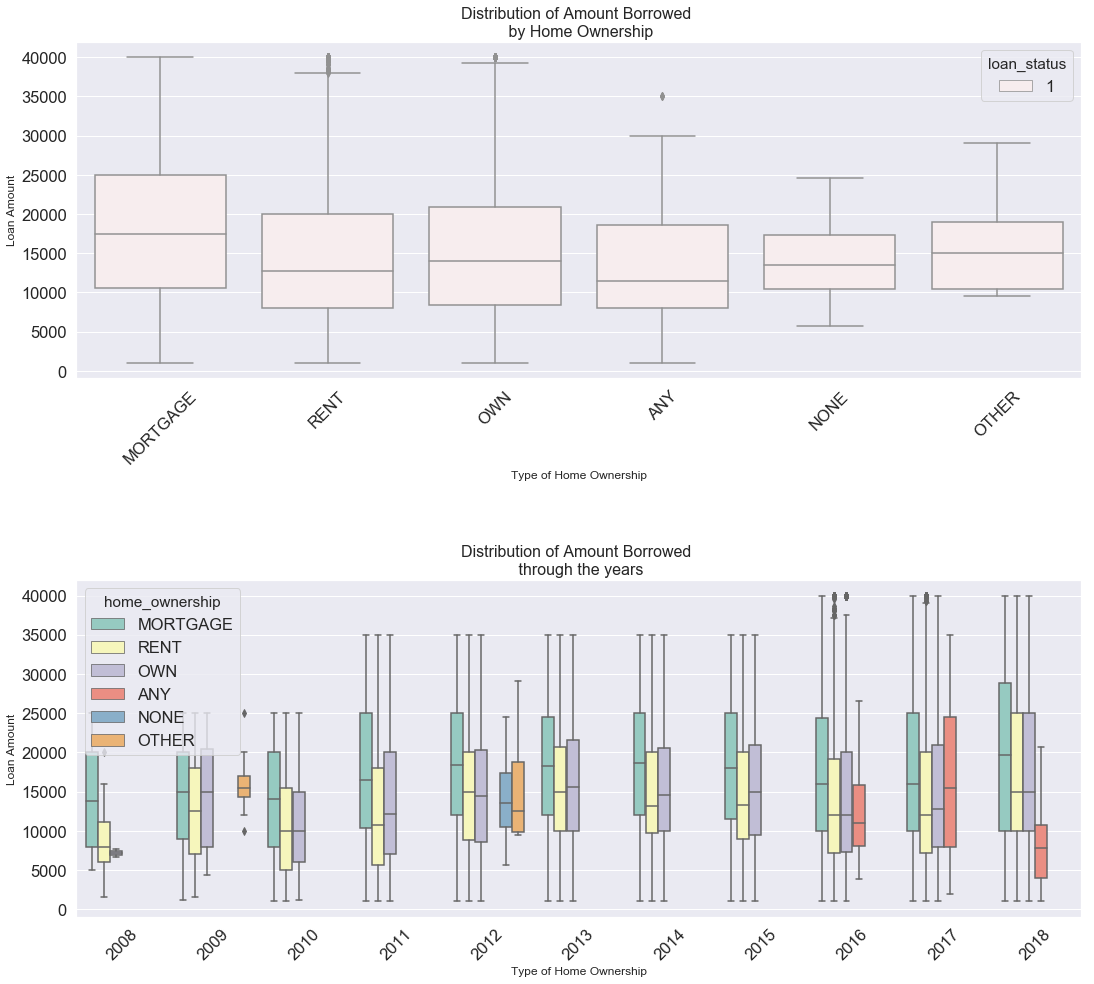

In [36]:

plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = df_new[df_new['loan_status'] == 1]

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amnt', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

The distribution of the amount borrowed by home ownership through the years is important to understand how the type of ownership will affect how much money is borrowed compared across the years.

Based on these series of graphs, some observations can be drawn:
1. 2007 was the first year of business, they are still figuring out loan amounts and gauging how to identify risks in the market. However, since they are expanding, they are likely to be less stringent with how they loan money. This is evident from the decrease in loan amounts across all types of home ownership in the next year, 2008.
2. Loan amounts has increased faster for profiles with rental homes in 2015 and 2018.
3. Outliers: loans to profiles with no home ownsership in 2012 and 25000 dollars to any home ownership in 2018.
4. `Any` home ownership is introduced in 2016 which is likely to have replaced 'other' in 2016.
5. No loans to other/any home ownership in 2007 and 2013-2015.
6. There is a cap to the amount borrowed which is 25000 dollars before 2011, 35000 dollars in 2011-2014, 40000 dollars in 2016-2018.
7. It is established that the amount of money borrowed is in tandem with the economic cycle. In general, the range of amounts and means have widened.

# Defaulted/ late loans
What are some of the factors affecting bad loans?

In [37]:
df_new.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,...,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code,year,income_category,employment_cat
369,0.0,10.0,TX,72.0,60000.0,NaN,Individual,9687.0,3818.0,9.1,...,0.0,4000.0,5200.0,NaN,Source Verified,NaN,760xx,2018,Low,5.0
402,0.0,2.0,OH,85.0,60000.0,NaN,Individual,41891.0,4974.0,72.8,...,0.0,1000.0,18300.0,NaN,Source Verified,NaN,435xx,2018,Low,3.0
576,0.0,5.0,AZ,44.0,55000.0,NaN,Individual,15327.0,28707.0,5.3,...,0.0,12950.0,42800.0,NaN,Source Verified,NaN,850xx,2018,Low,10.0
829,0.0,7.0,IL,17.0,68000.0,NaN,Individual,13364.0,68267.0,3.0,...,0.0,29050.0,72600.0,NaN,Source Verified,NaN,605xx,2018,Low,0.5
835,0.0,3.0,TN,78.0,42140.0,NaN,Individual,6233.0,1173.0,21.8,...,0.0,1000.0,6900.0,NaN,Source Verified,NaN,370xx,2018,Low,1.0


In [38]:
df_new['int_rate'].describe()

count    912808.000000
mean         13.966688
std           4.817415
min           5.310000
25%          10.750000
50%          13.490000
75%          16.990000
max          30.990000
Name: int_rate, dtype: float64

In [39]:
# Average interest is 13.3%. Since Anything above this will be considered of high risk let's see if this is true.
def interest_pay(data):
    data['interest_payments'] = np.nan
    #selecting rows where interest rates are more than the mean, explore whether to use a more representative number.
    data.loc[data['int_rate'] <= 13.30, 'interest_payments'] = 'Low'
    data.loc[data['int_rate'] > 13.30, 'interest_payments'] = 'High'
    df_1 = data
    return df_1

In [40]:
df_new = interest_pay(df_new)
    
df_new.interest_payments.value_counts()

High    477735
Low     435073
Name: interest_payments, dtype: int64

In [41]:
df_new['term'].value_counts()

 36 months    658578
 60 months    254230
Name: term, dtype: int64

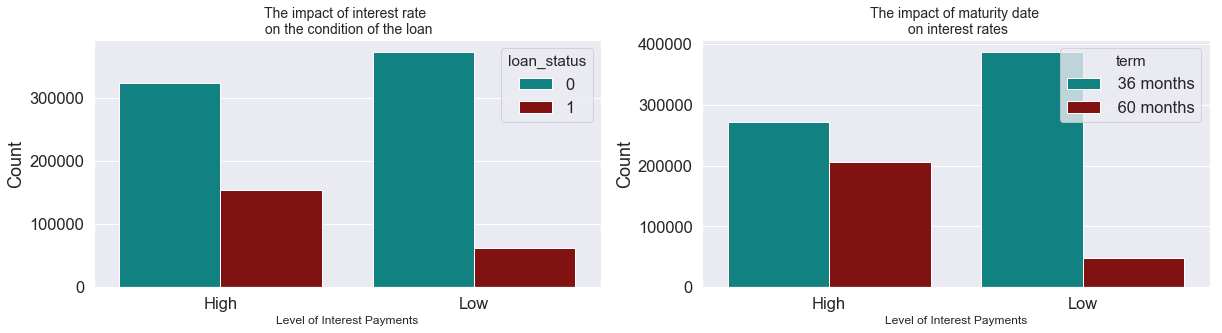

In [42]:
plt.figure(figsize=(20,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df_new, 
                  palette=palette, hue='loan_status')

ax.set_title('The impact of interest rate \n on the condition of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax1 = sns.countplot(x='interest_payments', data=df_new, 
                   palette=palette, hue='term')

ax1.set_title('The impact of maturity date \n on interest rates', fontsize=14)
ax1.set_xlabel('Level of Interest Payments', fontsize=12)
ax1.set_ylabel('Count')


plt.show()

Possible to investigate more thoroughly if there is an interest rate cutoff to better quantify a bad loan. Draw the simple histograms to determine an effective cut off point.

# Condition of loans and Purpose
is there a purpose that may contribute significantly to a bad loan. Give a summary.

In [43]:
df_new['purpose'].value_counts()

debt_consolidation    542756
credit_card           190042
home_improvement       56040
other                  53790
major_purchase         18115
small_business         13074
medical                10095
car                     8120
moving                  7082
vacation                5966
house                   5532
wedding                 1363
renewable_energy         737
educational               96
Name: purpose, dtype: int64

In [44]:
#Visualizations for the purpose

# Feature selection
Find the most correlated features, dumb and dirty method first then incorporate the ones that based on domain knowledge. It must take into account the context of an e-wallet predicting a good/bad loan based on data that is likely to be collected. 

Summary:
Do not fall for features that can only be collected after a bad loan is initiated, such as collection fee.

In [45]:
#Using Pearson Correlation
#plt.figure(figsize=(16,12))
cor = numeric_variables.corr()
#no point for heat map cause there are 112 numeric columns
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [46]:
#Correlation with output variable
cor_target = abs(cor["loan_status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

collection_recovery_fee    0.454865
hardship_dpd               0.233344
int_rate                   0.258293
last_pymnt_amnt            0.384223
loan_status                1.000000
recoveries                 0.478582
total_pymnt                0.352334
total_pymnt_inv            0.352109
total_rec_prncp            0.478620
Name: loan_status, dtype: float64

Tried 0.5 initially but there is nothing with very strong correlation. Going through this list, we can identify the top 10 correlated features with the target to be used while dropping the ones that have strong correlation among others.
1. Collection recovery fee refers to post charge off collection fee. Using this feature is a little bit like cheating in a sense that there will not be a collection recovery fee if the loan is good. When predicting, this feature cannot be used because this data is unlikely to be known BEFORE a loan becomes bad.
2. A hardship plan is a plan usually not advertised that features lower interest and minimum payment amount for those heading onto a rough patch. While signing up for this plan does not automatically mean the loan will be a bad one as there is no correlation of similar features of hardship with loan status, it does increase the chances of a bad loan by logic. Then again using this feature to predict a bad loan has the potential pitfall of the loan being bad before the hardship plan account is due. E.g missing payments for 30-45days is considered bad then signing up for a hardship plan and then missing that as well. Key is predicting it is bad even before the loan goes bad. There is some predictive power if information is collected before hand but this is accounted for under the credit score indirectly.
3. interest rate is a good predictor as discussed in other parts above.
4. Out principal is the amount balanced. Here it is flagged out because good loans are loans that have been fully paid. Current loans are not considered. What this feature shows in this context is that any remaining balance is likely to be bad loan which is true based on how loan status is considered. So once again this feature cannot be used.
5. Recoveries is the same as collection recovery fee.
6. Total payment refers to amount paid after receiving funds, but there is no reference to amount funded. Dont understand why it has a high correlation. It is like saying high amount paid regardless of loan amount is likely to have a high bad loan status. Regardless this will be used.
7. Principal received to date has a high correlation as well. This could be that higher amounts of principal paid will result in greater chances of loan being good. (could this be indicative that most loans go bad at the inital stages? Not many would go bad after consistent repayment periods. If they do, it is going to be bad. Essentially this is similar to total payments except this does not include the interest component.

Numerical features to be used: total_rec_prncp and int rate.

Credit scores can be obtained and should be used for the prediction as well.

Note: Cannot use account delinquent as target because it just means not having paid the minimum amount by the due date. Grace period will be included which is not fair for forgetful borrowers, current loans will be considered good but still has the potential to be bad. A more granular version, loan status can be more effective though it is more tedious.

For the feature selection, needs to account for the 5 areas of credit score.

Be careful of features that only comes AFTER a loan becomes bad because to implement a business model, we have to be careful with the data that can be collected. Here we are predicting a bad loan based on data that is assumed to be present. As more data is collected, loan amounts can be adjusted to reflect a lower risk but at the start there is little data collected for the individual so the risk of loan going bad has to be based on other features, not on features that can only be collected once the service goes live.

In [47]:
# This shows the amount of good loans that did not have to pay the collection recovery fee.
# The difference is likely due to straight defaults or charge offs where loan is bad and there is no collection.
print(len(df_new[df_new['collection_recovery_fee']==0]))
print(len(df_new[df_new['loan_status']==0]))

781524
695916


In [48]:
non_numeric = df_new.select_dtypes(include=["object"])
non_numeric.columns

Index(['addr_state', 'application_type', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'desc', 'disbursement_method',
       'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'hardship_end_date', 'hardship_flag', 'hardship_loan_status',
       'hardship_reason', 'hardship_start_date', 'hardship_status',
       'hardship_type', 'home_ownership', 'initial_list_status', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d',
       'payment_plan_start_date', 'purpose', 'pymnt_plan',
       'sec_app_earliest_cr_line', 'settlement_date', 'settlement_status',
       'sub_grade', 'term', 'title', 'verification_status',
       'verification_status_joint', 'zip_code', 'income_category',
       'interest_payments'],
      dtype='object')

We will proceed to screen these columns to confirm the features to be used. There are still around 37 categorical features that has to be selected. Below is a summary:
1. application type indicates if the borrower is solo or using a joint account. Attempt to remove all joint accounts.
2. Debt settlement flags out borrowers who has charged off before, whether he has been working with a settlement company. In this context, if this feature is used, the loan will definitely be bad. However, we would want to predict a bad loan based on preexisting data of charged offs prior to obtaining a loan at the current company. This feature cannot be used for prediction of loan status because in a real case scenario, unless there is prior data of debt settlement flags from elsewhere.
3. Earliest Credit line might be useful. Longer credit lines tend to be less risky as compared to shorter credit lines.
4. Any details of employment history is going to be important. Length. Title has too many columns.
5. Hardship plans should not be used as explained above for hardship delinquency days passed. Any potential predictive power can be accounted for under the credit score.
6. Home_ownership must be used.
7. Date has some relevance to economic conditions.
8. Hard credit pulls affect the score negatively. But this is just an administrative step before LC grants any loan so nothing special.
9. Credit scores may not be a good indicator of a bad loan as it is definitely better to predict good loans i.e. when it is approved.
10. Last payment date is not a good indicator as well because this data is assumed to not be available when predicting a bad loan.
11. Settlement also cannot be used.
12. grade can be used.
13. Verification status, need to exclude loans where the loans have been verified for income. It has source verified, verified and not verified.
14. Income category is tied to income. Decide whether to use income bands or income. Try both.
15. Interest payments are similar to interest rates. Decide whether to use interest payments whole or bands.
16. Purpose is important as well.



numerical:
int rate, income, debt to income ratio. Note there is no credit scores given. Since no credit scores are given, find out similar features that can represent the credit score. Public records, last inquiry, total accounts, open accounts, the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years, months since last record, months since last delinquency.

Categorical variables to be used:
Earliest credit line (how to convert this to length of credit line), employment stuff, home ownsership, grade, purpose


biggest challenge is to separate the features that only pop up when the loan has gone bad. Should we use these features for prediction, it cannot be translated to implementing a business model where there is no data in the first place to predict a bad loan.

Using predict proba to find a range. Set a threshold, then put on grades, decide how to distribute the bands, each grade will have different max loan amount and interest rates. Dont have to worry about default so no need set threshold.

In [49]:
df_new['term'] = df_new['term'].map(lambda x: 0 if x == ' 36 months' else 1)
df_new['term'].value_counts()

0    658578
1    254230
Name: term, dtype: int64

In [50]:
df_new['earliest_cr_line'].head()

369    Jun-2007
402    Sep-2007
576    Dec-2005
829    Jan-2009
835    Mar-2003
Name: earliest_cr_line, dtype: object

In [51]:
from time import strptime
df_new['month_cr'] = df_new['earliest_cr_line'].map(lambda x: x.split('-')[0])


In [52]:
#convert month name to numerical form
df_new['month_cr'] = df_new['month_cr'].map(lambda x: strptime(x,'%b').tm_mon)

In [53]:
df_new['month_cr'].value_counts()

8     89699
9     88567
10    87267
11    80031
3     74637
7     73910
12    73162
5     71312
6     70617
4     69715
1     67109
2     66782
Name: month_cr, dtype: int64

In [54]:
#find the year of when credit was first obtained
df_new['year_cr'] = df_new['earliest_cr_line'].map(lambda x: int(x.split('-')[1]))

In [55]:
#based on reference time of 12-2018, find time difference in months
df_new['cred_time'] = (df_new['year'] - df_new['year_cr']) * 12 + df_new['month_cr'] - 1

Logically, longer times of credit will show better utility and hence lower chance of default. This principle works the same with driving, insurance providers charge a premium on drivers below age 25 internationally. Plot the right graphs to show this point.

In [56]:
# Criteria for filtering excessive income that can skew the data, mean + 3 std.
upper_bound = np.mean(df_new['annual_inc']) + np.std(df_new['annual_inc']) * 3
#upper_bound

In [57]:
#Outliers that will be excluded
df_new[df_new['annual_inc'] > upper_bound].shape

(6511, 152)

In [58]:
df_new = df_new[df_new['annual_inc'] < upper_bound]

In [59]:
df_new['issue_d'] = df_new['issue_d'].map(lambda x: x.split('-')[0])

In [60]:
#What does any home ownership means? Rent, own or mortgaged?? It is not fair to assign any to any categories so it will be removed.
df_new_2 = df_new[df_new['home_ownership']!='ANY']
df_new = df_new_2[df_new_2['home_ownership'] != 'OTHER']
df_new['home_ownership'].value_counts()

MORTGAGE    439530
RENT        368579
OWN          97907
NONE            28
Name: home_ownership, dtype: int64

In [98]:
df_good_loans = df_new[df_new['loan_status'] == 0]
df_bad_loans = df_new[df_new['loan_status'] == 1]

In [100]:
df_good_loans_36 = df_good_loans[df_good_loans['term'] == 0]
df_good_loans_60 = df_good_loans[df_good_loans['term'] == 1]
df_bad_loans_36 = df_bad_loans[df_bad_loans['term'] == 0]
df_bad_loans_60 = df_bad_loans[df_bad_loans['term'] == 1]

In [112]:
df_good_loans_36['int_rate'].describe()

count    528032.000000
mean         12.242018
std           4.015933
min           5.310000
25%           9.170000
50%          11.990000
75%          14.490000
max          30.990000
Name: int_rate, dtype: float64

In [122]:
df_good_loans_60['loan_amnt'].describe()

count    162141.000000
mean      21008.919397
std        7920.406351
min        1000.000000
25%       15000.000000
50%       20000.000000
75%       26400.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [110]:
df_bad_loans_36['loan_amnt'].describe()

count    125237.000000
mean      13189.077110
std        8728.810341
min        1000.000000
25%        6600.000000
50%       10000.000000
75%       18000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [111]:
df_bad_loans_60['loan_amnt'].describe()

count    90634.000000
mean     20585.550125
std       7770.368379
min       1000.000000
25%      14400.000000
50%      20000.000000
75%      25000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [121]:
x123 = 12.2/100 * 3 * 13400
x123

4904.4

In [123]:
x124 = 16.7/100 * 5 * 21000
x124

17535.0

In [130]:
weight = 125 + 90

In [131]:
weighted_avg = (13100 * 125 + 20600 *90) / weight
weighted_avg

16239.53488372093

In [132]:
asf = 103000 * 7870 - 32000 * 16200
asf

292210000

In [133]:
abc = 65000 * 7870 - 21000 * 16200
abc

171350000

In [134]:
asf - abc 

120860000

In [61]:
combined_df = df_new[['cred_time', 'year', 'int_rate', 'annual_inc', 'dti', 'employment_cat', 'grade', 'purpose', 'home_ownership', 'loan_amnt', 'loan_status', 'pub_rec', 'delinq_2yrs', 'open_acc', 'total_acc', 'inq_last_6mths', 'mths_since_last_record', 'mths_since_last_delinq', 'chargeoff_within_12_mths', 'revol_bal', 'revol_util']]

In [62]:
#fill na with zeroes as some data such as months past last delinquency will be zero for those who dont have.
combined_df = combined_df.fillna(0)

In [63]:
numeric_variables1 = combined_df.select_dtypes(exclude=["object"])

In [64]:
numeric_variables1.columns

Index(['cred_time', 'year', 'int_rate', 'annual_inc', 'dti', 'employment_cat',
       'loan_amnt', 'loan_status', 'pub_rec', 'delinq_2yrs', 'open_acc',
       'total_acc', 'inq_last_6mths', 'mths_since_last_record',
       'mths_since_last_delinq', 'chargeoff_within_12_mths', 'revol_bal',
       'revol_util'],
      dtype='object')

In [65]:
cor1 = numeric_variables1.corr()

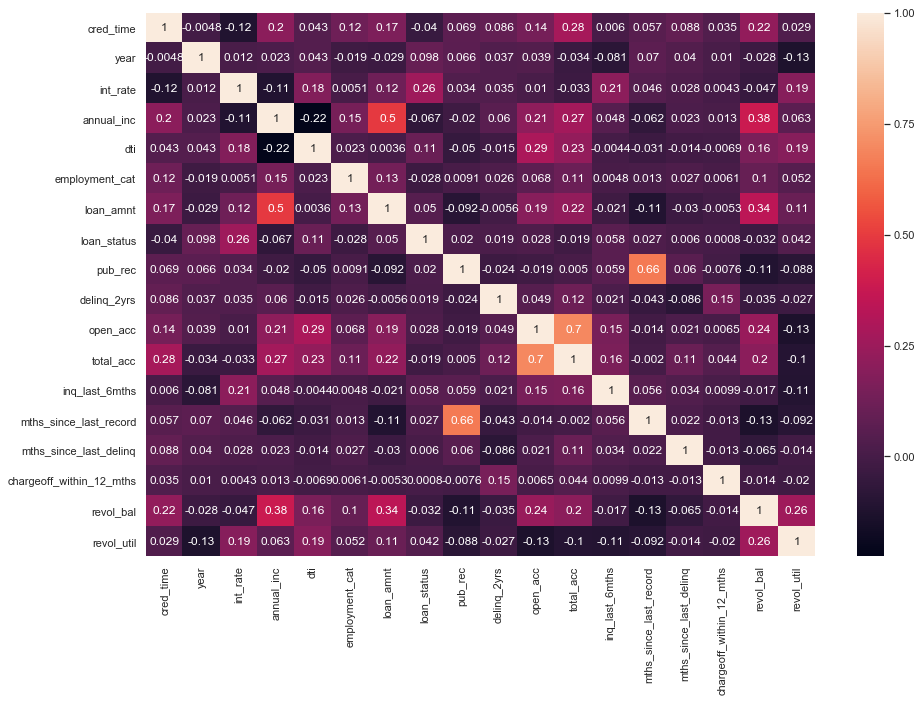

In [66]:
# filter out least correlated to loan status
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(cor1, annot=True)

In [67]:
#Correlation with output variable
cor_target = abs(cor1["loan_status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.02]
relevant_features

delinq_2yrs                 0.018958
total_acc                   0.018743
mths_since_last_delinq      0.005954
chargeoff_within_12_mths    0.000805
Name: loan_status, dtype: float64

In [68]:
combined_df = df_new[['purpose', 'cred_time', 'year', 'int_rate', 'annual_inc', 'dti', 'employment_cat', 'grade', 'home_ownership', 'loan_amnt', 'loan_status', 'open_acc', 'inq_last_6mths', 'revol_bal', 'revol_util', 'delinq_2yrs', 'total_acc', 'mths_since_last_delinq', 'chargeoff_within_12_mths', 'pub_rec']]

In [69]:
combined_df = combined_df.fillna(0)

In [70]:
combined_df.columns

Index(['purpose', 'cred_time', 'year', 'int_rate', 'annual_inc', 'dti',
       'employment_cat', 'grade', 'home_ownership', 'loan_amnt', 'loan_status',
       'open_acc', 'inq_last_6mths', 'revol_bal', 'revol_util', 'delinq_2yrs',
       'total_acc', 'mths_since_last_delinq', 'chargeoff_within_12_mths',
       'pub_rec'],
      dtype='object')

# Feature engineering

In [71]:
combined_df['grade'].value_counts()

C    272535
B    243392
D    154060
A    119425
E     79636
F     28651
G      8345
Name: grade, dtype: int64

In [72]:
def dummify(data):
    df2 = data
    grade_dm = pd.get_dummies(df2['grade'], drop_first=True)
    purpose_dm = pd.get_dummies(df2['purpose'], drop_first=True)
    home_dm = pd.get_dummies(df2['home_ownership'], drop_first=True)
    year_dm = pd.get_dummies(df2['year'], drop_first=True)
    df2.drop(columns=['grade', 'home_ownership', 'year', 'purpose'], inplace=True)
    df2 = pd.concat([df2, grade_dm, home_dm, year_dm, purpose_dm], axis=1)
    return df2

In [73]:
combined_df = dummify(combined_df)

In [74]:
combined_df.shape

(906044, 48)

In [75]:
combined_df.columns

Index([               'cred_time',                 'int_rate',
                     'annual_inc',                      'dti',
                 'employment_cat',                'loan_amnt',
                    'loan_status',                 'open_acc',
                 'inq_last_6mths',                'revol_bal',
                     'revol_util',              'delinq_2yrs',
                      'total_acc',   'mths_since_last_delinq',
       'chargeoff_within_12_mths',                  'pub_rec',
                              'B',                        'C',
                              'D',                        'E',
                              'F',                        'G',
                           'NONE',                      'OWN',
                           'RENT',                       2009,
                             2010,                       2011,
                             2012,                       2013,
                             2014,                     

# Create test data, apply train-test-split on train

In [76]:
# X, y
X = combined_df.drop(columns='loan_status')
y = combined_df['loan_status']

In [77]:
len(combined_df[combined_df['loan_status'] == 1]) 

215871

In [78]:
len(combined_df[combined_df['loan_status'] == 0]) 

690173

In [79]:
#Just do train test split 70/30 for train and test then train test split again the test on 50/50 for test and validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [80]:
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [81]:
#70% training 15% validation 15% test with equal proportions of data
y_train.value_counts()

0    483120
1    151110
Name: loan_status, dtype: int64

In [82]:
#Essentially predicting with a 76% baseline.
target_ratio = y_test.value_counts()[1] / len(y_test)
target_ratio

0.238251157041212

In [83]:
#For the sake of training we are going to split the X_train, y_train into 1/10 its current size, find the best model then revert
#X_train_90, X_train_10, y_train_90, y_train_10 = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [84]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_validation)
#reminder to use X_train_10, y_train_10, X_validation and y_validation

In [85]:
#based on the target_ratio, it means that even if the model predict every target as negative i.e. good loan,
#it will achieve around 80% accuracy. hence we will proceed to apply SMOTE to oversample to deal with this unbalanced dataset.
from imblearn.over_sampling import SMOTE

sm = SMOTE()
#need to assign new variable name cause will be plotting graph below and require it to be a df not array.
X_train_smote, y_train_smote = sm.fit_sample(X_train_sc, y_train)

Using TensorFlow backend.
/Users/evan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/evan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/evan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/evan/anaconda3/lib/python3.7/site-packages/tensorflo

In [86]:
#Check to confirm if the number of samples for good loans and bad loans are the same
np.bincount(y_train_smote)

array([483120, 483120])

# Basic logistic regression model with no tuning

In [87]:
from sklearn.metrics import f1_score, recall_score
#Initialize model first
lr = LogisticRegression(solver='liblinear')

In [88]:
def eval_metric(fitted_model):
    predictions = fitted_model.predict(X_test_sc)
    predict_prob =  fitted_model.predict_proba(X_test_sc)[:,1]
    tn, fp, fn, tp = confusion_matrix(y_validation, predictions).ravel()
    print("True Negatives: %s" % tn)
    print("False Positives: %s" % fp)
    print("False Negatives: %s" % fn)
    print("True Positives: %s" % tp)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('\n')
    print("Precision: {}" .format(precision))
    print("Recall: {}" .format(recall))
    print ("F1 score: {}".format(f1_score(y_validation, predictions)))
    print("roc_auc score: {}".format(roc_auc_score(y_validation, predict_prob)))
    print('model score on train data: {}'.format(fitted_model.score(X_train_smote, y_train_smote)))
    print('model score on validation data: {}'.format(accuracy_score(y_validation, predictions)))

In [89]:
#Check cv score for train data first
print(cross_val_score(lr, X_train_smote, y_train_smote, cv=3, scoring='roc_auc'))

[0.70007903 0.70715616 0.70581706]


In [90]:
#cv score okay, fit on train, since this is the first simple model, everything will be done
smote = lr.fit(X_train_smote, y_train_smote)
#Evaluate on validation based on the defined function above
eval_metric(smote)

True Negatives: 64778
False Positives: 38748
False Negatives: 10911
True Positives: 21470


Precision: 0.35653791225215054
Recall: 0.6630431425836139
F1 score: 0.4637199105821877
roc_auc score: 0.7006473083315637
model score on train data: 0.6486049014737539
model score on validation data: 0.6346104321337385


roc score of 0.68. Try other features first then do a gridsearch before attempting other models. Tried inputting credit features but no change to roc_auc score

In [211]:
def lr_plot(fitted_model):
    list_2 = zip(list(X_train.columns), list(fitted_model.coef_[0]))
    pl = abs(pd.Series(dict(list_2))).sort_values(ascending=False).head(15)
    pl.plot(kind='barh', title='Top 15 important features', fontsize=25)
    plt.ylabel('Feature Importance Score')

In [212]:
list_2 = zip(list(X_train.columns), list(smote.coef_[0]))
pl = pd.Series(dict(list_2)).sort_values(ascending=False).head(60)
pl

C                           0.392829
D                           0.360156
E                           0.302261
int_rate                    0.300643
B                           0.248017
loan_amnt                   0.222689
2016                        0.210686
debt_consolidation          0.188420
F                           0.181228
2017                        0.178816
credit_card                 0.144757
open_acc                    0.138101
dti                         0.131994
RENT                        0.128717
home_improvement            0.115365
2018                        0.108392
2015                        0.107982
G                           0.093480
other                       0.086558
small_business              0.082959
revol_util                  0.063594
major_purchase              0.063378
medical                     0.047002
inq_last_6mths              0.045740
vacation                    0.037806
moving                      0.031904
OWN                         0.030056
h

/Users/evan/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


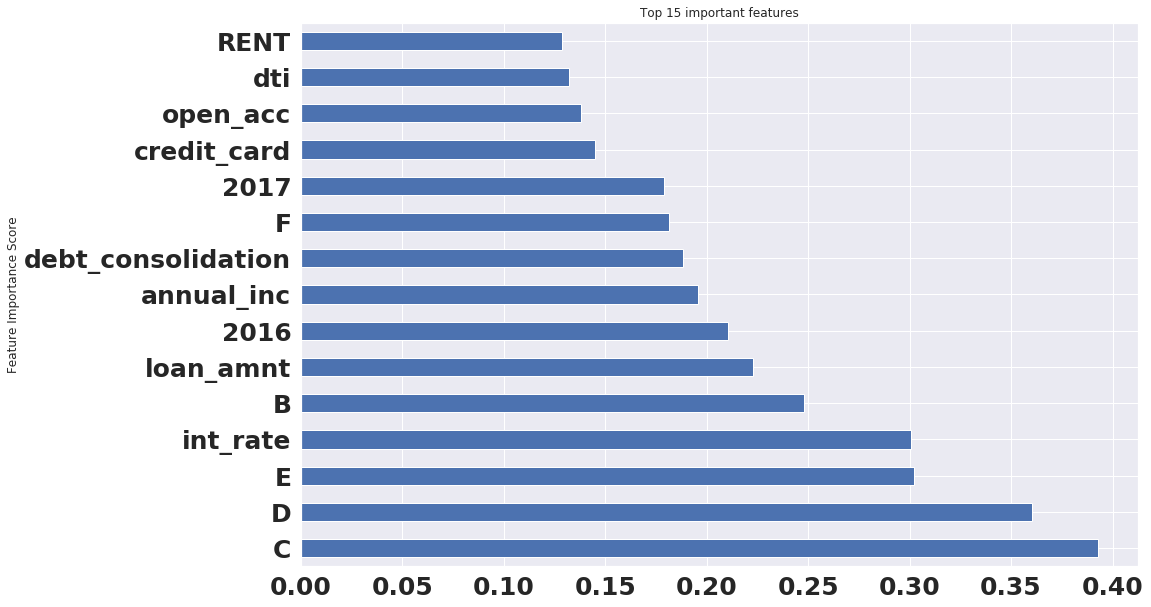

In [213]:
lr_plot(smote)
plt.rcParams.update({'font.size': 100})

# Grid search on logit to find the optimal value of C

In [94]:
def grid_search_des(model):
    print("Model's best score from grid search:{}".format(model.best_score_))
    print("Model's best params from grid search:{}".format(model.best_params_))
    #Recall to use you can call the best estimator

In [95]:
#Logistic Regression grid search
gs_params = {
    'penalty': ['l1', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'C': np.logspace(-1, 2, 5)
}

lr_gridsearch = GridSearchCV(
    LogisticRegression(),
    gs_params,
    cv=3,
    n_jobs=-1,
    error_score=0.0
)

In [135]:
#Grid Search has component of cv, so no need to do cross val score beforehand.
reg_model = lr_gridsearch.fit(X_train_smote, y_train_smote)

In [136]:
grid_search_des(reg_model)
eval_metric(reg_model)

Model's best score from grid search:0.6481588425235966
Model's best params from grid search:{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
True Negatives: 64778
False Positives: 38748
False Negatives: 10913
True Positives: 21468


Precision: 0.35651654045436426
Recall: 0.6629813779685618
F1 score: 0.4636867285117229
roc_auc score: 0.7006533579538482
model score on train data: 0.6486038665341944
model score on validation data: 0.6345957161882758


In [ ]:
    predictions = fitted_model.predict(X_test_sc)
    predict_prob =  fitted_model.predict_proba(X_test_sc)[:,1]
    tn, fp, fn, tp = confusion_matrix(y_validation, predictions).ravel()
    print("True Negatives: %s" % tn)
    print("False Positives: %s" % fp)
    print("False Negatives: %s" % fn)
    print("True Positives: %s" % tp)

In [143]:
predict_prob_6 = reg_model.predict_proba(X_test_sc)[:,1]

In [145]:
predict_prob_6 = pd.Series(predict_prob_6)

In [147]:
predict_prob_6 = predict_prob_6.map(lambda x: 1 if x > 0.6 else 0)

In [148]:
predict_prob_6 = predict_prob_6.to_numpy()

In [150]:
predict_prob_6_p =  reg_model.predict_proba(X_test_sc)[:,1]

tn, fp, fn, tp = confusion_matrix(y_validation, predict_prob_6).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

precision = tp/(tp+fp)
recall = tp/(tp+fn)
print('\n')
print("Precision: {}" .format(precision))
print("Recall: {}" .format(recall))
print ("F1 score: {}".format(f1_score(y_validation, predict_prob_6)))
print("roc_auc score: {}".format(roc_auc_score(y_validation, predict_prob_6_p)))
print('model score on train data: {}'.format(reg_model.score(X_train_smote, y_train_smote)))
print('model score on validation data: {}'.format(accuracy_score(y_validation, predict_prob_6)))

True Negatives: 83870
False Positives: 19656
False Negatives: 18129
True Positives: 14252


Precision: 0.4203137902559868
Recall: 0.44013464686081344
F1 score: 0.42999592692603605
roc_auc score: 0.7006533579538482
model score on train data: 0.6486038665341944
model score on validation data: 0.7219790003458247


In [153]:
84000 * 7870 - 14000 * 16200

434280000

In [155]:
434.3 - 292.2

142.10000000000002

# Voting Classifier using logit and AdaboostClassifier (w PCA)
Will be adding individual model best params into the voting classifier and then running grid search with PCA n_components.

In [156]:
#Ensemble methods
from sklearn.ensemble import VotingClassifier
#soft voting usually have better performance than hard voting


log_clf = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)
adb_clf = AdaBoostClassifier()
#randomizedsearch showed n_estimators to be 1000 but processing time takes too long.


pipeline = Pipeline([
    ('PCA', PCA()),
    ('voting_clf', VotingClassifier(estimators=[("lr",log_clf), ("adb", adb_clf)], voting="soft"))])


cross_val_score(pipeline, X_train_smote, y_train_smote, cv=3, scoring='roc_auc')

array([0.70017378, 0.70774069, 0.70642159])

In [157]:
#PCA_LR_ADB = random_adb.fit(X_train_smote, y_train_smote) 
#grid_search_des(PCA_LR_ADB)
PCA_LR_ADB = pipeline.fit(X_train_smote, y_train_smote) 
eval_metric(PCA_LR_ADB)

True Negatives: 64762
False Positives: 38764
False Negatives: 10939
True Positives: 21442


Precision: 0.3561439059229977
Recall: 0.6621784379728853
F1 score: 0.4631751757806171
roc_auc score: 0.7006857693720168
model score on train data: 0.6490333664513992
model score on validation data: 0.634286681333559


# Try Voting Classifier on logit and gradientboost with PCA (not selected)
Results are comparable to adaboost, with adaboost having a slightly higher recall.

In [158]:
#Ensemble methods
from sklearn.ensemble import VotingClassifier
#soft voting usually have better performance than hard voting


log_clf = LogisticRegression()
gb_clf = GradientBoostingClassifier()


pipeline = Pipeline([
    ('reduce_dims', PCA()),
    ('voting_clf', VotingClassifier(estimators=[("lr",log_clf), ("gb", gb_clf)], voting="soft"))])

#search = GridSearchCV(pipeline, param_grid, iid=False, cv=5)
#search.fit(X_digits, y_digits)

cross_val_score(pipeline, X_train_smote, y_train_smote, cv=3, scoring='roc_auc')

/Users/evan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/evan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/evan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.69888626, 0.71952953, 0.71803259])

In [159]:
PCA_LR_GB = pipeline.fit(X_train_smote, y_train_smote) 
eval_metric(PCA_LR_GB)

/Users/evan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


True Negatives: 65257
False Positives: 38269
False Negatives: 11078
True Positives: 21303


Precision: 0.35760088632243336
Recall: 0.6578857972267688
F1 score: 0.4633454047176274
roc_auc score: 0.700076990333055
model score on train data: 0.6570437986421593
model score on validation data: 0.6369061196259207


# Randomized Search CV for adaboost without PCA (to find best params for adaboost)
Result is n_estimators of 1000 and default learning rate. However, it seems to prioritize precision way more than recall. There is also the drawback of processing time. Feature importances also show that only top features were selected which does not make logical sense.

In [160]:
#Randomized Search without PCA on ADB for best params, then do feature importance -> then put respective best
#params into voting classifier then with PCA, do gridsearch.
# param_grid = {'n_estimators':[200,500,1000,2000],
#               'learning_rate':[.001,0.01,.1,1]
#              }


# adb_clf = AdaBoostClassifier(random_state=42)

# # run grid search
# random_adb = RandomizedSearchCV(adb_clf, param_distributions=param_grid, scoring = 'roc_auc', n_iter=10, cv=3, n_jobs=-1)

In [161]:
#adb_model = random_adb.fit(X_train_smote, y_train_smote)

In [162]:
# grid_search_des(adb_model)
# eval_metric(adb_model)

In [163]:
# #find feature importances (check code)
# list_2 = zip(list(X_train_10.columns), list(adb_model.feature_importances_))
# pl = abs(pd.Series(dict(list_2))).sort_values(ascending=False).head(20)
# pl.plot(kind='barh', title='Feature Importances')
# plt.ylabel('Feature Importance Score')

Based on random search for adaboost, best parameters yielded n_estimators = 1000 with a default learning rate, tried to run on voting classifer but takes too long to run. Good to note also that adaboost on its own is not good as it prioritize on improving precision than recall which is bad in this context. Nevertheless using it as part of an ensemble method such as voting classifier together with logistic regression, it is able to improve ROC and f1_score slightly more than logistic regression. The feature importances from adaboost alone do not look useful too, with a heavy emphasis on only some features. This can be the result of missing data bias and hence it prioritizes some features and keeping the rest zero.

# Trying different models (Adaboost, gradient boost, decision tree, random forest)

In [164]:
# Adaboost
adb = AdaBoostClassifier()
cross_val_score(adb, X_train_smote, y_train_smote, cv=3, scoring='roc_auc')

array([0.66591419, 0.82795861, 0.82882288])

In [165]:
adb_model = adb.fit(X_train_smote, y_train_smote)
#Evaluate on validation based on the defined function above
eval_metric(adb_model)

True Negatives: 71941
False Positives: 31585
False Negatives: 14365
True Positives: 18016


Precision: 0.3632184834983166
Recall: 0.5563756523887465
F1 score: 0.43951111219536
roc_auc score: 0.680682041044691
model score on train data: 0.7055576254346746
model score on validation data: 0.6619011529943271


In [166]:
# gradientboost
gdb = GradientBoostingClassifier()
cross_val_score(gdb, X_train_smote, y_train_smote, cv=3, scoring='roc_auc')

array([0.66999585, 0.93192969, 0.93271406])

In [167]:
gdb_model = gdb.fit(X_train_smote, y_train_smote)
#Evaluate on validation based on the defined function above
eval_metric(gdb_model)

True Negatives: 85951
False Positives: 17575
False Negatives: 19924
True Positives: 12457


Precision: 0.4147908897176345
Recall: 0.3847009048516105
F1 score: 0.39917965808405304
roc_auc score: 0.6894885127466165
model score on train data: 0.7837814621626097
model score on validation data: 0.7240833805469917


In [168]:
# Decision tree
dt = DecisionTreeClassifier()
cross_val_score(dt, X_train_smote, y_train_smote, cv=3, scoring='roc_auc')

array([0.56866617, 0.79718703, 0.79977335])

In [169]:
dt_model = dt.fit(X_train_smote, y_train_smote)
#Evaluate on validation based on the defined function above
eval_metric(dt_model)

True Negatives: 77708
False Positives: 25818
False Negatives: 21019
True Positives: 11362


Precision: 0.3055944055944056
Recall: 0.3508847781106204
F1 score: 0.32667730481160423
roc_auc score: 0.5507490752983796
model score on train data: 1.0
model score on validation data: 0.6553746311816169


In [170]:
# Random Forest
rf = RandomForestClassifier()
cross_val_score(rf, X_train_smote, y_train_smote, cv=3, scoring='roc_auc')

/Users/evan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/evan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/evan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.75890723, 0.93092193, 0.9244611 ])

In [171]:
rf_model = rf.fit(X_train_smote, y_train_smote)
#Evaluate on validation based on the defined function above
eval_metric(rf_model)

/Users/evan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


True Negatives: 89996
False Positives: 13530
False Negatives: 23507
True Positives: 8874


Precision: 0.3960899839314408
Recall: 0.27404959698588677
F1 score: 0.3239572875787167
roc_auc score: 0.6466888277197831
model score on train data: 0.9929023845007452
model score on validation data: 0.7274827639488768


In [172]:
# knn = KNeighborsClassifier()
# cross_val_score(knn, X_train_smote, y_train_smote, cv=3, scoring='roc_auc')

In [173]:
# knn_model = knn.fit(X_train_smote, y_train_smote)
# #Evaluate on validation based on the defined function above
# eval_metric(knn_model)

In [174]:
# svm = SVC()
# cross_val_score(svm, X_train_smote, y_train_smote, cv=3, scoring='roc_auc')

In [175]:
# svm_model = svm.fit(X_train_smote, y_train_smote)
# #Evaluate on validation based on the defined function above
# eval_metric(svm_model)

Summary of models tried:
1. SVC (takes too long to run due to number of samples)
2. KNN (takes too long to run due to number of samples)
3. Adaboost
4. Gradient boost
5. Decision tree (poor roc and low f1 score)
6. Random forest (poor roc and low f1 score, possible to improve by increasing number of estimators but with large dataset, this is not feasible)

Summary of entire workflow:
1. Removed data from joint accounts and non-verified income loans
2. Proper definition of good/bad loans
3. EDA
4. filter out most correlated features and used logical thinking to add/remove them
5. Used domain knowledge to supplement the features
6. Created new features like credit length and removed extreme annual income data
7. Convert data into continuous like employment years (numerical ones)
8. From this new set of features, filter numerical ones and run a correlation matrix again to remove least correlated features even though it makes sense with domain knowledge
9. Dummy variables: grade and purpose
10. Create train test split: 70% Train, 15% validation 15% test, stratified.
11. Smote to oversample data
12. Logistic regression + grid search
13. All other models, performance summary above
14. extract feature importance
15. RandomizedSearch done on ensemble method and adaboost but n_estimators too many and resulted in long processing time and better precision but huge drawback to recall. Appreciate if someone can tell me why.
16. Use ensemble methods with pca to get the highest roc score and f1 score.
17. Poor f1_score but likely to be able to optimize depending on threshold set.

In [176]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.


pred_proba = [i[1] for i in smote.predict_proba(X_test_sc)]

pred_proba

[0.6490550877515526,
 0.3756659908351499,
 0.5560329718736068,
 0.5943291835962734,
 0.5181032900863003,
 0.6993061387976596,
 0.4636832178739168,
 0.32194880647770063,
 0.1811538610661279,
 0.564847346654975,
 0.6573245628574736,
 0.2308893683515765,
 0.47585291128643437,
 0.42551880419368476,
 0.5440995750636937,
 0.1788274868474473,
 0.43775974704587056,
 0.3958585673831575,
 0.5874966923616871,
 0.5490061997978343,
 0.35523576419253344,
 0.2580748402336916,
 0.5370407655931121,
 0.1512844737531114,
 0.6369117448699201,
 0.28456476724697644,
 0.4120615401659857,
 0.1569793426949809,
 0.22252058435828495,
 0.5117609691069204,
 0.7232457113872629,
 0.8374440032714736,
 0.4378207581311215,
 0.7131127607798187,
 0.7052099478944516,
 0.20114326874003838,
 0.3665610368469456,
 0.7083890876392809,
 0.7893674337651828,
 0.33611603557854874,
 0.3799089433738583,
 0.3665014400416128,
 0.5234971689655196,
 0.3759455495652594,
 0.42580335353827337,
 0.6526905444903894,
 0.3880773728531804,
 0.3

In [177]:
pred_df = pd.DataFrame({'true_values': y_validation,
                        'pred_probs':pred_proba})

Text(0.5, 0, 'Predicted Probability that Outcome = 1')

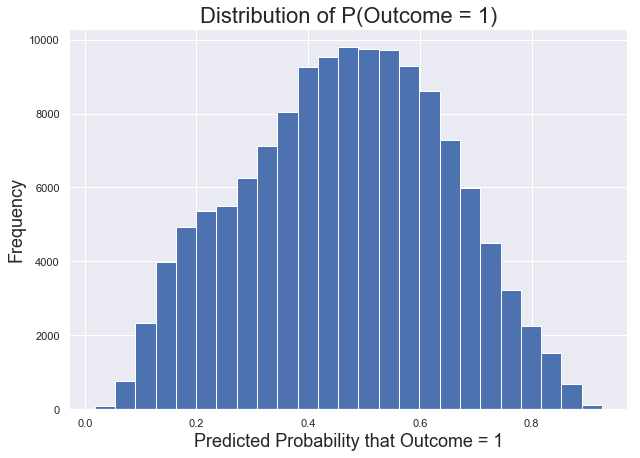

In [178]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(pred_df['pred_probs'], bins=25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

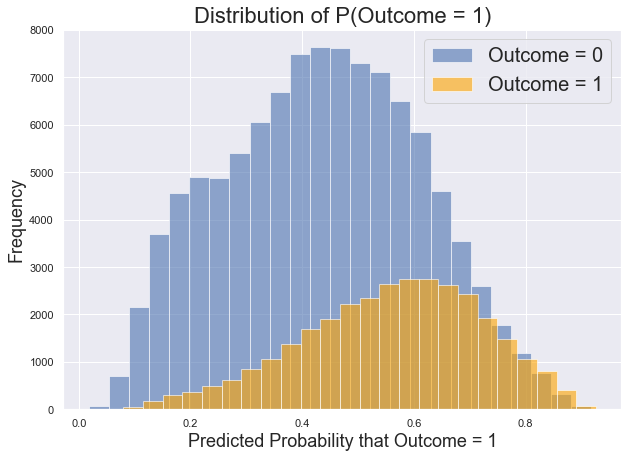

In [179]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

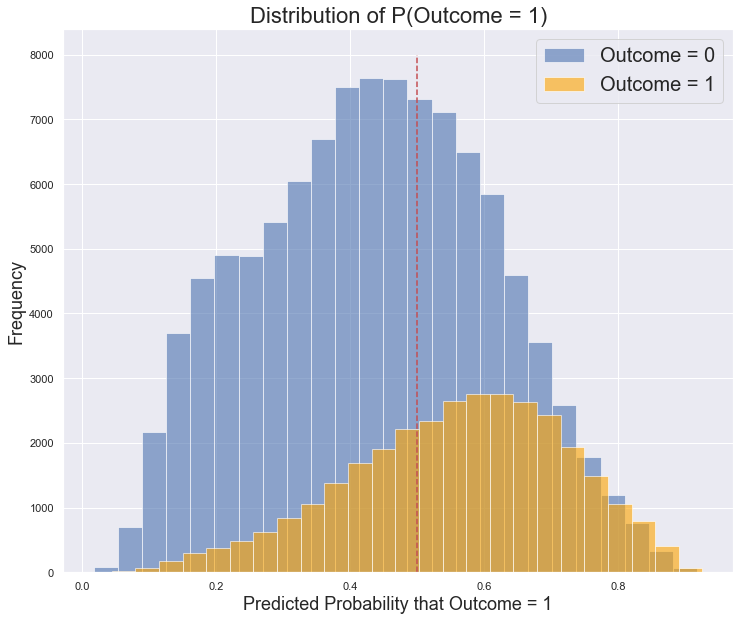

In [180]:
# Create figure.
plt.figure(figsize = (12,10))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 8000,
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

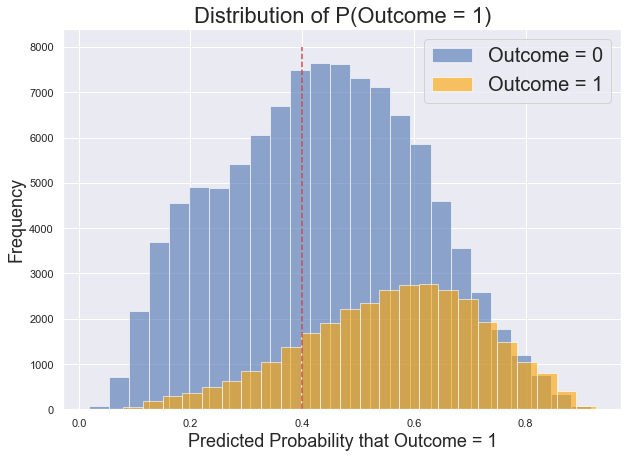

In [181]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.1.
plt.vlines(x=0.4,
           ymin = 0,
           ymax = 8000,
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

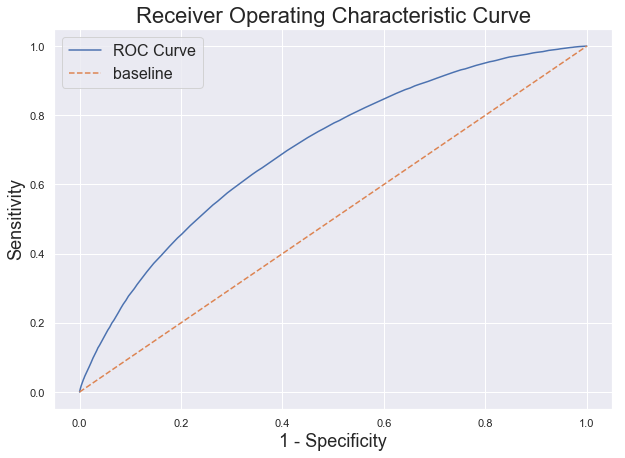

In [182]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

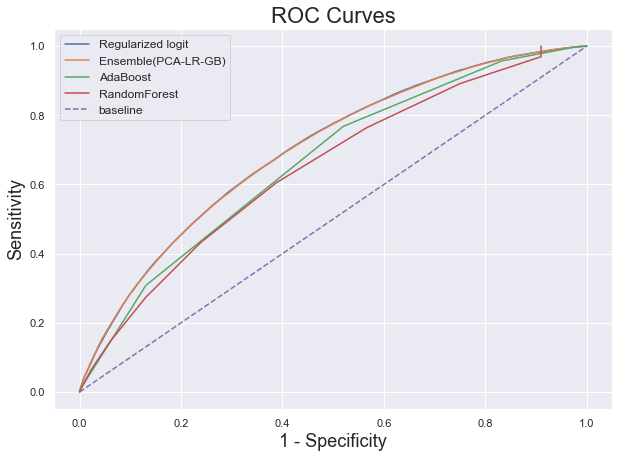

In [183]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

def precision_recall_f1(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    
    if(true_positive+false_positive !=0):
        prec = true_positive/(true_positive+false_positive)
        rec = true_positive/(true_positive+false_negative)
        f1= 2 * (prec * rec) / (prec +rec)
        return [prec, rec, f1, threshold]



def pred_df(fitted_model):
    pred_proba = [i[1] for i in fitted_model.predict_proba(X_test_sc)]
    df2 = pd.DataFrame({'true_values': y_validation,
                        'pred_probs':pred_proba})
    return df2


    
    
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
#tpr_values_smote = [TPR(pred_df(smote), 'true_values', 'pred_probs', prob) for prob in thresholds]
#fpr_values_smote = [FPR(pred_df(smote), 'true_values', 'pred_probs', prob) for prob in thresholds]
tpr_values_reg = [TPR(pred_df(reg_model), 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values_reg = [FPR(pred_df(reg_model), 'true_values', 'pred_probs', prob) for prob in thresholds]
tpr_values_PCA_LR_GB = [TPR(pred_df(PCA_LR_GB), 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values_PCA_LR_GB = [FPR(pred_df(PCA_LR_GB), 'true_values', 'pred_probs', prob) for prob in thresholds]
# tpr_values_PCA_LR_ADB = [TPR(pred_df(PCA_LR_ADB), 'true_values', 'pred_probs', prob) for prob in thresholds]
# fpr_values_PCA_LR_ADB = [FPR(pred_df(PCA_LR_ADB), 'true_values', 'pred_probs', prob) for prob in thresholds]
tpr_values_adb = [TPR(pred_df(adb_model), 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values_adb = [FPR(pred_df(adb_model), 'true_values', 'pred_probs', prob) for prob in thresholds]
# tpr_values_gb = [TPR(pred_df(gb_model), 'true_values', 'pred_probs', prob) for prob in thresholds]
# fpr_values_gb = [FPR(pred_df(gb_model), 'true_values', 'pred_probs', prob) for prob in thresholds]
# tpr_values_dt = [TPR(pred_df(dt_model), 'true_values', 'pred_probs', prob) for prob in thresholds]
# fpr_values_dt = [FPR(pred_df(dt_model), 'true_values', 'pred_probs', prob) for prob in thresholds]
tpr_values_rf = [TPR(pred_df(rf_model), 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values_rf = [FPR(pred_df(rf_model), 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
# plt.plot(fpr_values_smote, # False Positive Rate on X-axis
#          tpr_values_smote, # True Positive Rate on Y-axis
#          label='logit')
                      
plt.plot(fpr_values_reg, # False Positive Rate on X-axis
          tpr_values_reg, # True Positive Rate on Y-axis
          label='Regularized logit')

plt.plot(fpr_values_PCA_LR_GB, # False Positive Rate on X-axis
          tpr_values_PCA_LR_GB, # True Positive Rate on Y-axis
          label='Ensemble(PCA-LR-GB)')
                      
# plt.plot(fpr_values_PCA_LR_ADB, # False Positive Rate on X-axis
#          tpr_values_PCA_LR_ADB, # True Positive Rate on Y-axis
#          label='Ensemble(PCA-LR-ADB)')                      

plt.plot(fpr_values_adb, # False Positive Rate on X-axis
          tpr_values_adb, # True Positive Rate on Y-axis
          label='AdaBoost')
                      
# plt.plot(fpr_values_gb, # False Positive Rate on X-axis
#          tpr_values_gb, # True Positive Rate on Y-axis
#          label='GradientBoost')                      
                      
# plt.plot(fpr_values_dt, # False Positive Rate on X-axis
#          tpr_values_dt, # True Positive Rate on Y-axis
#          label='DecisionTree')                      
                      
plt.plot(fpr_values_rf, # False Positive Rate on X-axis
          tpr_values_rf, # True Positive Rate on Y-axis
          label='RandomForest')     

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
#plt.title('ROC Curve with AUC = {}'.format(round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)), fontsize=22)
plt.title('ROC Curves', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=12);

In [184]:
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
res = [precision_recall_f1(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

prec = [val[0] for val in res if val!=None ]
rec = [val[1] for val in res if val!=None]
f1 = [val[2] for val in res if val!=None]
thres = [val[3] for val in res if val!=None]


plt.plot(thres, # False Positive Rate on X-axis
         prec, # True Positive Rate on Y-axis
         label='Precision');

plt.plot(thres, # False Positive Rate on X-axis
         rec, # True Positive Rate on Y-axis
         label='Recall');

plt.plot(thres, # False Positive Rate on X-axis
         f1, # True Positive Rate on Y-axis
         label='F1');

plt.vlines(x=0.5,
           ymin = 0,
           ymax = 1,
           color='r',
           linestyle = '--')

# # Plot baseline. (Perfect overlap between the two populations.)
# plt.plot(np.linspace(0, 1, 200),
#          np.linspace(0, 1, 200),
#          label='baseline',
#          linestyle='--')

# # Label axes.
# plt.title('ROC Curve with AUC = {}'.format(round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)), fontsize=22)
# plt.ylabel('Sensitivity', fontsize=18)
# plt.xlabel('1 - Specificity', fontsize=18)

# # Create legend.
plt.legend(fontsize=16);

TypeError: 'function' object is not subscriptable

# Apply best model from validation set to apply on test set

In [ ]:
X_test_test_sc = ss.transform(X_test)

In [ ]:
def eval_test(fitted_model):
    predictions = fitted_model.predict(X_test_test_sc)
    predict_prob =  fitted_model.predict_proba(X_test_test_sc)[:,1]
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print("True Negatives: %s" % tn)
    print("False Positives: %s" % fp)
    print("False Negatives: %s" % fn)
    print("True Positives: %s" % tp)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('\n')
    print("Precision: {}" .format(precision))
    print("Recall: {}" .format(recall))
    print ("F1 score: {}".format(f1_score(y_test, predictions)))
    print("roc_auc score: {}".format(roc_auc_score(y_test, predict_prob)))
    print('model score on train data: {}'.format(fitted_model.score(X_train_smote, y_train_smote)))
    print('model score on validation data: {}'.format(accuracy_score(y_test, predictions)))

In [ ]:
eval_test(reg_model)